### Klasser och objekt

Vid flera tillfällen har vi använt oss av listor, som har haft så kallade *medlemsfunktioner*, funktioner inbyggda i variablerna som man kallar med ``.``-notation. Exempelvis

``
byzantine_emperors = ["Konstans", "Justinius", "Irene", "Basileios II"]
byzantine_emperors.pop()               
byzantine_emperors.append("Theodora")  
``

som ju tar bort sista elementet ("Basileios II") och sedan lägger till "Theodora" i slutet. 

Inte alla variabler har den här typen av interna funktioner. Listor är exempel på så kallade *objekt* i Python. Objekt är användardesignade datatyper (se förra föreläsningen). De är sammansatta typer, som kan innehålla både andra variabler och hela funktioner.


Objekt är en viktig del i så kallad objekt-orienterad programmering. Det är dock så fundamentalt att det är i princip omöjligt att täcka i en så här liten kurs. Vi ger en liten överblick för att ni skall kunna använda dem.

#### Vad är en klass?
Enklast uttryckt är en klass en mall för behållare. Behållarna är objekt, som kan innehålla egna variabler och funktioner.
Klassen definierar vilka typer av funktioner och variabler de får innehålla.

Klasser är ritningar för hur objekt skall skapas. I Python skrivs de exempelvis så här:

In [17]:
class Car:
    
    wheels = 4
    doors  = 4

``wheels`` och ``doors`` är klassvariabler. Det är egenskaper som alla bilar av vår typ delar. Det blir som en behållare för våra hjul- och dörr-variabler. Man kan skapa en *instans* av klassen och komma åt klassvariablerna med ``.``-notation:

In [18]:
my_car = Car
print(my_car.wheels)

4


En annan bil kommer ha exakt samma egenskaper, även om vi skapar en ny variabel:

In [19]:
your_car = Car
print(your_car.wheels)

4


#### Vad är ett objekt?
Ett objekt är en så kallad *instans* av en klass. Objekt förhåller sig till klasser så som hus förhåller sig till ritningar. Objekt kan innehålla attribut (e.g. antal dörrar i ett hus, antal våningar) men också funktioner (hus.öppna_dörr, hus.stäng_dörr). 

Problemet är att vår bil-mall är väldigt oflexibel. De kan ha olika märken, färg, acceleration och liknande. Men i grunden kräver vi att de måste ha 4 hjul och 4 dörrar. Om vi vill kunna skapa lite mer olika bilar, måste vi skriva som följer:

In [20]:
class Car:
    
    wheels = 4
    doors  = 4
    
    def __init__(self, brand, colour, acceleration):
        
        self.brand_of_car = brand
        self.colour_of_car = colour
        self.acceleration_of_car = acceleration
        

``__init__(self, brand, colour, acceleration)`` är en *konstruktionsfunktion* som används för att skapa objekt med attribut som inte delas av alla objekt. Argumenten ``brand, colour, acceleration`` används när man skapar objektet för att bestämma egenskaperna. Det första argumentet, ``self``, används internt av Python för att egenskaperna ska sättas för endast denna instansen av objektet, och inte något annat.

In [22]:
# Man kallar på __init__ funktionen automatiskt när man konstruerar klassen.
# Vi kan namnge argumenten om vi vill
my_car = Car(brand="BMW", colour="green", acceleration=15)

# Vi behöver inte namnge argumenten om vi vet ordningen
your_car = Car("Volvo", "black", 120)

Observera att dessa två variabler tillhör samma *klass* men är två olika *objekt*. De har alltså samma antal hjul och dörrar, men andra instansattribut:

In [26]:
print("Number of wheels of my car:", my_car.wheels)
print("Number of wheels of your car:", your_car.wheels)
print("-----------------------------")
print("Brand of my car: ", my_car.brand_of_car)
print("Brand of your car: ", your_car.brand_of_car)

Number of wheels of my car: 4
Number of wheels of your car: 4
-----------------------------
Brand of my car:  BMW
Brand of your car:  Volvo


Klasser kan också definiera medlemsfunktioner för objekten, som i sin tur modifierar attributen. Bilar har ju i allmänhet inte samma hastighet vid samma tidpunkt, så vi låter bilen kunna accelerera över en tid:

In [31]:
class Car:
    
    wheels = 4
    doors  = 4
    
    def __init__(self, brand, colour, acceleration):
        
        self.speed = 0 # Nytt attribut
        self.brand_of_car = brand
        self.colour_of_car = colour
        self.acceleration_of_car = acceleration
        
    def accelerate(self, duration): # Ny funktion
        
        self.speed =  self.speed + self.acceleration_of_car * duration
        

In [35]:
my_car = Car("Volvo", "black", 120)
my_other_car = Car("Volvo", "black", 10)

print("First speed of my car: ", my_car.speed)
print("First speed of my other car: ", my_other_car.speed)

my_car.accelerate(duration=10)
my_other_car.accelerate(duration=10)

print("Second speed: ", my_car.speed)
print("Second speed of my other car: ", my_other_car.speed)


First speed of my car:  0
First speed of my other car:  0
Second speed:  1200
Second speed of my other car:  100


Båda bilar har ett nytt attribut vid namn ``speed``. Observera dock att i medlemsfunktionen ``accelerate`` så refererar vi till det egna objektets hastighet och acceleration med nyckelordet ``self``, och deras hastighet ändras oberoende av varandra.

**Sammanfattning**

Nästan allt som skrivs i Python är egna objekt och funktioner som löser specifika problem. Nyckeln till att programmera i språket är att lära sig att använda olika färdigskrivna objekt. Vi börjar med ett exempel skrivning och läsning av datafiler som använder sig av objekt av typen ``File``.

**Utmaning!**

Skriv en klass som symboliserar en bok. Boken skall ha följande egenskaper:
- titel
- antal sidor
- författare
- nuvarande sida

samt en funktion
- en funktion som vänder blad (uppdaterar nuvarande sida)


### Skrivning av filer
En viktig del av programmering är så kallad I/O, eller input/output av information till och från datorn. Ett exempel på output är funktionen ``print`` som vi är väl bekanta med nu, som ju skriver till skärmen. Ett exempel på input är koden vi skriver till datorn i cellerna.

Det är dock vanligt att I/O inbegriper filer: Att man har data samlat i exempelvis text- eller Excel-filer man vill läsa av programmatiskt.

#### Öppna och stäng filer
Filer i programmeringsspråk måste *öppnas* och *stängas*. Filer öppnas med den inbyggda funktionen [open](https://docs.python.org/3/library/functions.html#open). Detta returnerar ett fil-objekt av klassen ``File``, som har inbyggda funktioner för att läsa, stänga och modifiera filen. ``open(path, mode)`` har ett argument ``mode`` specificerar exempelvis om filen skall läsas eller skrivas till.

- ``'r'``: "read", läsning av filer
- ``'w'``: "write", skrivning till filer

Ett filobjekt ``file`` som öppnats i läsläge har den inbyggda funktionen ``file.read()`` som läser vanlig text till en sträng.

In [5]:
# Ladda en text-fil till ett fil-objekt
f = open('example_file.txt', mode='r')

# Använd den inbyggda funktionen .read() hos fil-objektet
text_in_file = f.read()

# Stäng filen
f.close()

print(text_in_file)

Fackelfester i forntidshallar.
Det spillda vinet ångar.
Ur det slocknade skenet glimmar
kungars pannband.
Flackande skuggor slickar
unga lemmar i klirrande rassel:
dans i smycken; dans i vapen.
Druckna skymningar faller och faller,
brinner, tätnar,
sväller och slukar,
kramar glimmet, dränker minnet,
borrar:
hetare, blindare, tätare,
bort i törstiga mörker en glödrubin.


#### Utnyttja scopes med nyckelordet *with*
Att glömma stänga filer innebär att man kan råka modifiera en file senare, eller att man öppnar den med pekaren mitt i texten. Nyckelordet ``with`` tillåter en definiera variabler (exempelvis en fil-variabel) inom ett begränsat scope. Då stängs filen automatiskt.

In [8]:
with open('example_file.txt', mode='r') as f:
    text_in_file = f.read()
    
# print(text_in_file)

**OBS!**

Den inbyggda funktionen ``.read()`` kräver att din text-fil är fri från formattering (kursiv text, listor, tabeller et c.). Filformat som .doc, .docx som används av Microsoft Word har gömd formattering för att det ska se snyggt ut. Dessa kan alltså inte läsas av pythons inbyggda funktioner.

Men som vi skall se finns det externa bibliotek som möjliggör läsning av ex.-vis .docx.

In [10]:
# Testa att läsa en word-fil
with open('word_example.docx', mode='r') as f:
    
    # Funktionen skickar ett felmeddelande, då den hittat formatterings-karaktärer
    # som inte är unicode.
    word_text = f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 15: invalid start byte

Vi kan också testa att läsa en .csv-fil eller Excel-fil med den inbyggda funktionen. Excel-filen fungerar inte, eftersom den har gömd formattering för att se bra ut i Office-paketet.

In [14]:
# Testa att läsa en Excel-fil
with open('löner.xlsx', mode='r') as f:
    
    # Funktionen skickar ett felmeddelande, då den hittat formatterings-karaktärer
    # som inte är unicode.
    excel_text = f.read()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

Däremot fungerar .csv-filen, som ju bara är (semikolon)-separerad text. Problemet är ju dock att innehållet nu är en textsträng, vilket gjort att vi mist all funktionalitet i ett kalkylblad.

In [16]:
with open('löner.csv', mode='r') as f:
    
    # Funktionen skickar ett felmeddelande, då den hittat formatterings-karaktärer
    # som inte är unicode.
    csv_text = f.read()
    
print(csv_text)

First name;Last name;Salary
Klara;Rosgren;38000
Elin;B:son;40000
Niklas;Lindquist;15000
Abbe;Karlsson;40000
Carola;Hagman;75000



### Paket
Problemet med att läsa Excel-, CSV- och Word-dokument har lett oss till sista ämnet i kursen, och den stora styrkan med programmering: Färdiga paket.

Den mesta funktionaliteten ni saknar medan ni programmerar har redan implementerats som ett paket som ni kan importera och använda i er kod. Vi ska här exemplifiera med några passande paket för läsning av text, kalkylark, samt visualisering.

#### Pandas
Vi börjar med ett någorlunda okänt paket som löser vårt problem med att läsa .xlsx och .csv-filer, nämligen [pandas](https://pandas.pydata.org/). Vi måste först installera paketet. Det sköts oftast i python med en så kallad *pakethanterare*, vid namn **pip**. I Jupyter Notebook skriver vi så här:

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


Varpå paketet kan importeras med uttrycket ``import pandas as pd``, och vi kan använda dess inbyggda funktioner ``.read_excel()`` och ``.read_csv()``.

In [39]:
import pandas as pd
pd.read_excel('löner.xlsx')
# Datan är nu inläst, men inte sparad i en variabel

,First name,Last name,Salary
0,Klara,Rosgren,38000
1,Elin,B:son,40000
2,Niklas,Lindquist,15000
3,Abbe,Karlsson,40000
4,Carola,Hagman,75000


In [7]:
# Observera att man måste specificera vad datan separeras av, exempelvis komma ',' eller semikolon ';'
pd.read_csv('löner.csv', delimiter=';')
# Datan är nu inläst, men inte sparad i en variabel

,First name,Last name,Salary
0,Klara,Rosgren,38000
1,Elin,B:son,40000
2,Niklas,Lindquist,15000
3,Abbe,Karlsson,40000
4,Carola,Hagman,75000


Pandas returnerar ett objekt, som vanligen kallas *DataFrame*, vilket motsvarar ett blad i ett kalkylark. Detta kan indexeras som en lista eller dictionary, med kolumnnamn.

Kolumnen returneras som en typ av lista, som indexeras på vanligt vis.

In [40]:
df = pd.read_excel('löner.xlsx')
print(df['First name'])

0     Klara
1      Elin
2    Niklas
3      Abbe
4    Carola
Name: First name, dtype: object


In [14]:
print(df["First name"][0])

Klara


#### Matplotlib
Ett annat viktigt verktyg särskilt inom digital humaniora och data science är visualisering i form av grafer. Standardpaketet för visualisering i Python är [matplotlib](https://matplotlib.org/), som tillåter visualisering av siffror och text. Tidigare har det verktyget använts både i Session 1 och Session 2. Vi börjar med att installera det.

In [36]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Vi kan nu använda det för att visualisera lönerna hos de olika anställda. I matplotlib finns flera funktioner som används för att skapa ett figur-objekt, och sedan modifiera det. På samma sätt som vi modifierade hastigheten i bil-objektet modifierar dessa funktioner de visuella egenskaperna hos figur-objektet.

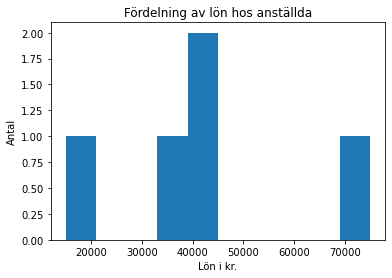

In [51]:
import matplotlib.pyplot as plt # Observera att vi bara behöver en del av paketet, som heter PyPlot

löner = df["Salary"]

# Skapa en figur och ett axel-objekt
fig, ax = plt.subplots()

# Välj vilken typ av graf du vill visa i dina axlar
ax.hist(löner)

# Sätter x-axelns namn
ax.set_xlabel("Lön i kr.")

# Sätter y-axelns namn
ax.set_ylabel("Antal")

# Sätt titel på figuren
ax.set_title("Fördelning av lön hos anställda")

# Visar figuren (inte obligatoriskt i Jupyter)
plt.show()


Vi kan också använda visualisera med en bar-plot, som har namn eller kategorier på x-axeln. En sådan visualisering är bara lämplig om man har väldigt få kategorier eller personer.

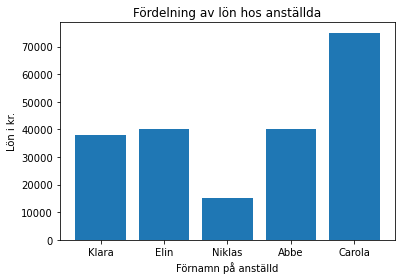

In [53]:
löner = df["Salary"]
folk  = df["First name"]

# Skapa en figur och ett axel-objekt
fig, ax = plt.subplots()

# Skapar en bar-graf i axlarna
ax.bar(folk, löner) # x = folk, y = löner

# Sätter x-axelns namn
ax.set_ylabel("Lön i kr.")

# Sätter y-axelns namn
ax.set_xlabel("Förnamn på anställd")

# Sätt titel på figuren
ax.set_title("Fördelning av lön hos anställda")

# Visar figuren (inte obligatoriskt i Jupyter)
plt.show()

Observera skillnaden i visualiseringarna: Första figuren visar *hur många* som har en viss lön, medan den andra visar vilken lön vissa individer har.

Vi tar ett annat exempel för att visa olika typer av visualiseringar. Från SCB har vi samlat lite data om hela Sveriges hyresläge för lägenheter, samt deras yta. Vi läser in från CSV med Pandas:

In [85]:
df = pd.read_csv("rent_and_area.csv")
df.head(5) # Visar 5 första raderna i dataframen

,Year,Rent,CI Rent,Rent/kvm,CI Rent/kvm,Avg kvm,Area kvm nybyggt
0,2003,51351,232,774,3,68,80.2
1,2004,52864,241,798,3,68,75.2
2,2005,54242,251,818,3,68,76.5
3,2006,54701,255,826,3,68,76.9
4,2007,55749,273,842,3,68,79.0


Vi skapar flera grafer i samma figur-objekt genom att mata argumentet 2 till ``plt.subplots``:

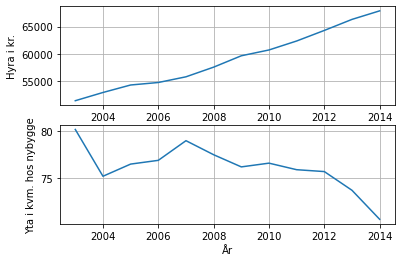

In [95]:
year = df["Year"]
rent  = df["Rent"]
area = df["Area kvm nybyggt"]
# Skapa flera figur och ett axel-objekt
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(year, rent) 
ax1.set_ylabel("Hyra i kr.")
ax1.grid()
ax2.plot(year, area)

ax2.set_ylabel("Yta i kvm. hos nybygge")
ax2.set_xlabel("År")
ax2.grid()

plt.show()

Vi ser då att samtidigt som hyrorna har ökat totalt, så har storleken på nybyggda lägenheter minskat konsekvent sedan 2003. Man kan också lägga båda grafer i samma axlar:

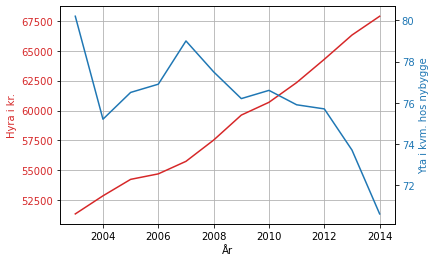

In [98]:
fig, ax1 = plt.subplots()

color = 'tab:red'

ax1.set_xlabel('År')
ax1.set_ylabel('Hyra i kr.', color=color)
ax1.plot(year, rent, color=color)

ax1.tick_params(axis='y', labelcolor=color) # Sätt färgen på axeln

ax2 = ax1.twinx()  # Skapa en tvilling-axel på samma figur

color = 'tab:blue'
ax2.set_ylabel('Yta i kvm. hos nybygge', color=color) 
ax2.plot(year, area, color=color)
ax2.tick_params(axis='y', labelcolor=color) # Sätt färgen på axeln

ax1.grid()